In [1]:
import pandas as pd
import numpy as np
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rcParams
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.interpolate import griddata

In [2]:
acoustic17 = pd.read_csv('../data/acousticData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2017.csv')
acoustic17 = acoustic17[acoustic17.Longitude!=999]
acoustic19 = pd.read_csv('../data/acousticData/2017_2019/Arctic_EIS_Acoustic_trawl_survey_alongtrack_summary_2019.csv')
acoustic19 = acoustic19[acoustic19.Longitude!=999]
trawlSites = pd.read_csv('../data/catchData/2017_2019/AIERP_EventData.csv')
ctdSites = pd.read_csv('catchAnalysis/analysisFiles/dfStat.csv')
ctdSites['time'] = pd.to_datetime(ctdSites.time)

In [3]:
etopoFile = '../data/etopo1_bedrock.asc'
topo_file = open(etopoFile, 'r')
ncols = int(topo_file.readline().split()[1])
nrows = int(topo_file.readline().split()[1])
xllcorner = float(topo_file.readline().split()[1])
yllcorner = float(topo_file.readline().split()[1])
cellsize = float(topo_file.readline().split()[1])
topo_file.close()
dres = 1
etopo = np.loadtxt(etopoFile, skiprows=5)
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
lons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
lats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]
rlons, rlats = (np.meshgrid(lons[:-1],lats[:-1]))

# Draw etopo1, first for land and then for the ocean, with different colormaps
llevels = np.arange(-500,2251,100) # check etopo.ravel().max()
#lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=cm.terrain)
#olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
olevels1 = [-1000,-100, -40]
olevels2 = [0,10000]
olevels3 = [0]


C:\Users\rober\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\rober\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\rober\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:1508: UserWarning: linewidths is ignored by contourf
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
C:\Users\rober\Anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\rober\Anaconda3\lib\site-packages\cartopy\mpl\gridliner

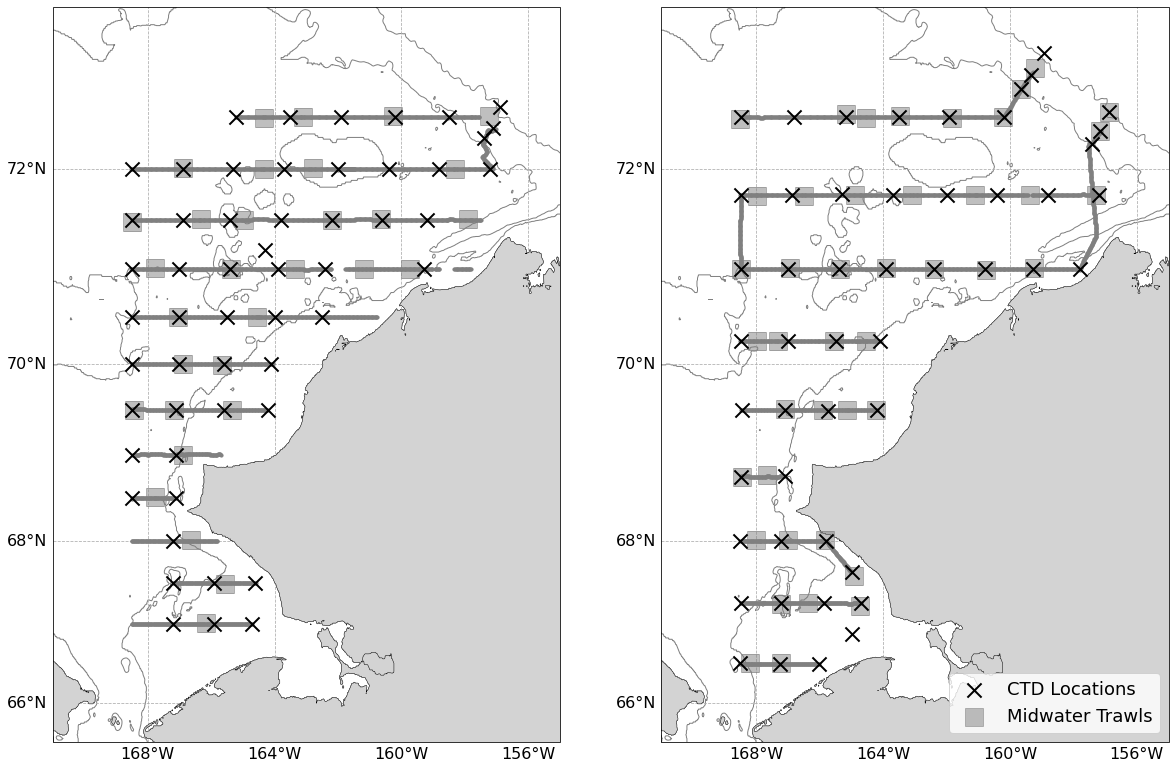

In [14]:
figure = plt.figure(figsize=(20,20))
extent=[-155,-171,65.5,73.5]

ax=plt.subplot(121,projection=ccrs.Mercator())
rcParams['contour.negative_linestyle'] = 'solid'
rcParams['lines.linewidth'] = .5
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=1)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# plot the CTD locations
df = ctdSites[(ctdSites.time.dt.year == 2017)]
a = ax.scatter(df.longitude.values, df.latitude.values,s=200,marker = 'x',c = 'k',linewidth=2,transform=ccrs.PlateCarree(),zorder=6)

# plot the Trawl locations
df = trawlSites[trawlSites.SURVEY == 201701]
a = ax.scatter( df.EQ_LONGITUDE.values, df.EQ_LATITUDE.values,s=300,marker = 's',facecolor= 'grey',edgecolor = 'grey',alpha=0.5,transform=ccrs.PlateCarree(),zorder=5)

# plot the acoustic transect
a = ax.scatter(acoustic17.Longitude, acoustic17.Latitude,s=10,c='grey',transform=ccrs.PlateCarree(),zorder=4)

lfill = ax.contourf(rlons, rlats, etopo, olevels2, colors ='lightgrey',linewidths=1,transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
cso1 = ax.contour(rlons, rlats, etopo, olevels1, colors ='grey',linewidths=1,transform=ccrs.PlateCarree(),zorder=0)#cmap=cm.ocean)
cso3= ax.contour(rlons, rlats, etopo, olevels3, colors ='k',linewidths=.5,transform=ccrs.PlateCarree(),zorder=3)#cmap=cm.ocean)
ax.set_extent(extent)

ax=plt.subplot(122,projection=ccrs.Mercator())
rcParams['contour.negative_linestyle'] = 'solid'
rcParams['lines.linewidth'] = .5
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linestyle='--',zorder=1)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# plot the CTD locations
df = ctdSites[(ctdSites.time.dt.year == 2019)]
a = ax.scatter(df.longitude.values, df.latitude.values,s=200,marker = 'x',c = 'k',linewidth=2,transform=ccrs.PlateCarree(),zorder=6)

# plot the Trawl locations
df = trawlSites[trawlSites.SURVEY == 201901]
a = ax.scatter( df.EQ_LONGITUDE.values, df.EQ_LATITUDE.values,s=300,marker = 's',facecolor= 'grey',edgecolor = 'grey',alpha=0.5,transform=ccrs.PlateCarree(),zorder=5)

# plot the acoustic transect
a = ax.scatter(acoustic19.Longitude, acoustic19.Latitude,s=10,c='grey',transform=ccrs.PlateCarree(),zorder=4)

plt.legend(['CTD Locations','Midwater Trawls'],loc=4,fontsize=18)

lfill = ax.contourf(rlons, rlats, etopo, olevels2, colors ='lightgrey',linewidths=1,transform=ccrs.PlateCarree(),zorder=2)#cmap=cm.ocean)
cso1 = ax.contour(rlons, rlats, etopo, olevels1, colors ='grey',linewidths=1,transform=ccrs.PlateCarree(),zorder=0)#cmap=cm.ocean)
cso3= ax.contour(rlons, rlats, etopo, olevels3, colors ='k',linewidths=.5,transform=ccrs.PlateCarree(),zorder=3)#cmap=cm.ocean)
ax.set_extent(extent)